<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exo4chap9_exo3chap10_01fev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 chap 9 page 93 

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data_credit=pd.read_pickle('/Users/jeremymaignier/Desktop/M2 280 ISF /SEMESTRE 2/Machine_learning/credit.pkl')
data_credit


for i in data_credit.index:
    if data_credit.loc[i,'A16']=='-':
        data_credit.loc[i,'A16']=0
        
    elif data_credit.loc[i,'A16']=='+':
        data_credit.loc[i,'A16']=1

data_credit.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


### Question 1

In [0]:
features=list(data_credit)
target=['A16'] #variable à expliquer
features=[o for o in features if o not in 'A16']

X=data_credit[features]
Y=data_credit[target]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2018)

### Question 2 

In [0]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
scal.fit(X)

X_train_scaled=scal.transform(X_train)
X_test_scaler=scal.transform(X_test)


On doit scaler les données afin de pouvoir effectuer un apprentissage homogène sur des données qui sont référencées selon la même échelle. 

### Question 3

In [0]:
from sklearn.svm import SVC
clf=SVC(C=1,kernel='linear')
clf.fit(X_train_scaled,Y_train.values.ravel())
Y_pred=clf.predict(X_test_scaler)

Y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

### Question 4 

In [0]:
from sklearn.metrics import precision_score
precision_score(Y_test,Y_pred) 

0.8481012658227848

### Question 5 

In [0]:
clf1=SVC(C=1.0,kernel='rbf',gamma=1/40,probability=True)
clf1.fit(X_train_scaled,Y_train.values.ravel())
Y_pred1=clf1.predict(X_test_scaler)

### Question 6 

In [0]:
precision_score(Y_test,Y_pred1)

0.8641975308641975

### Question 7 

In [0]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(Y_test,clf1.predict_proba(X_test_scaler)[:,1])
score

0.9399910434393193

### Question 8 

In [0]:
from sklearn.model_selection import GridSearchCV
parameters={"C":np.linspace(0.1,4,20),"gamma":np.linspace(0.1,1,50),"degree":list(range(1,3))}
clf2=GridSearchCV(SVC(kernel='poly'),parameters,scoring='roc_auc',cv=5)
clf2.fit(X_train_scaled,Y_train.values.ravel())
print(clf2.best_params_)
clf2.best_score_

{'C': 0.1, 'degree': 1, 'gamma': 0.17346938775510207}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9311760300489077

Les paramètres optimaux trouvés sont :
C = 0.1; 
degré=1;
gamma=0.17346938775510207

### Question 9 

In [0]:
clf3=SVC(C=0.1,kernel='poly',gamma=0.17346938775510207,degree=1,probability=True)
clf3.fit(X_train_scaled,Y_train.values.ravel())
score1=roc_auc_score(Y_test,clf3.predict_proba(X_test_scaler)[:,1])
score1

0.9301388266905508

# Exercice 3 chap 10(10.2.4) page 103

In [0]:
import numpy as np 
import pandas as pd 

data_insurance=pd.read_pickle('/Users/jeremymaignier/Desktop/M2 280 ISF /SEMESTRE 2/Machine_learning/insurance.pkl')
data_insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Question 1

In [0]:
features=list(data_insurance)
target=['charges']
features=[o for o in features if o not in 'charges']
X=data_insurance[features]
Y=data_insurance[target]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2003)

### Question 2

In [0]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
scal.fit(X)

X_train_scal=scal.transform(X_train)
X_test_scal=scal.transform(X_test)


### Question 3

In [0]:
from sklearn.svm import SVR
SVMR=SVR(C=200,kernel='linear',epsilon=1,gamma=0.08)
SVMR.fit(X_train_scal,Y_train.values.ravel())
Y_predi=SVMR.predict(X_test_scal)

### Question 4

In [0]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predi) 

0.7460326169450318

### Question 5

In [0]:
SVMRPOLY=SVR(C=800,kernel='poly',epsilon=1,degree=3)
SVMRPOLY.fit(X_train_scal,Y_train.values.ravel())
Y_predi1=SVMRPOLY.predict(X_test_scal)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Question 6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

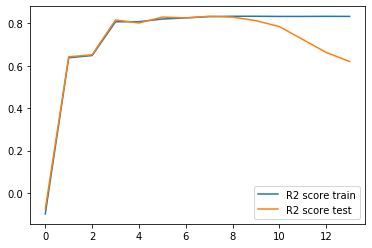

In [0]:
res=[]
for i in range(14):
    SVRMPOLY2=SVR(C=800,kernel='poly',epsilon=1,degree=i)
    SVRMPOLY2.fit(X_train_scal,Y_train.values.ravel())
    resultat=[i,r2_score(Y_train,SVRMPOLY2.predict(X_train_scal)),r2_score(Y_test,SVRMPOLY2.predict(X_test_scal))]
    res.append(resultat)


r2_train=[o[1] for o in res]
r2_test=[o[2] for o in res]
axix=[o[0] for o in res]

plt.plot(axix,r2_train,label='R2 score train')
plt.plot(axix,r2_test,label='R2 score test')
plt.legend(loc=4)
plt.show()
